In [32]:
import numpy as np 
import pandas as pd 
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/credit.csv")

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [42]:
df.describe() # prints only numerical variables

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [43]:
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [44]:
df.describe(exclude="int64") # prints non-numerical variables

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,'no checking','existing paid',radio/tv,'<100','1<=X<4','male single',none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


<AxesSubplot:>

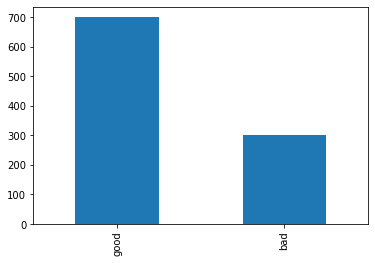

In [35]:
df['class'].value_counts().plot(kind="bar")

Text(0.5, 0.98, 'credit amount by class')

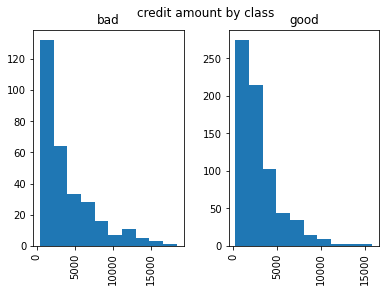

In [86]:
df.hist(by="class", column='credit_amount')
plt.suptitle("credit amount by class")

Text(0.5, 0.98, 'cred. duration by class')

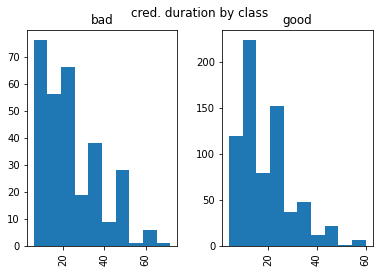

In [87]:
df.hist(by="class", column='duration')
plt.suptitle("cred. duration by class")

Text(0.5, 0.98, 'age by class')

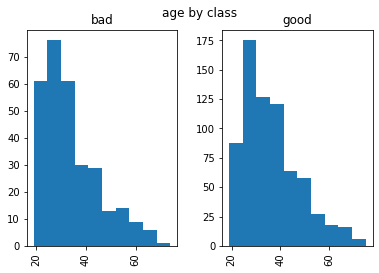

In [82]:

df.hist(by="class", column='age')
plt.suptitle("age by class")

Text(0.5, 0.98, 'employment by class')

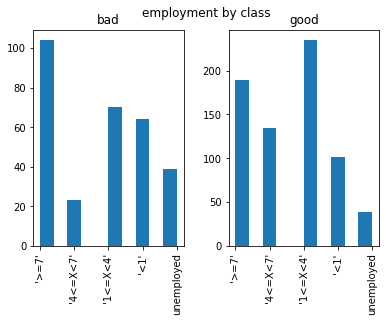

In [81]:
df.hist(by="class", column='employment', sharex=True)
plt.suptitle("employment by class")

Text(0.5, 0.98, 'checking status by class')

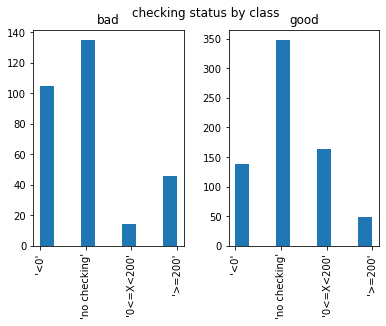

In [89]:
df.hist(by="class", column='checking_status', sharex=True)
plt.suptitle("checking status by class")

Text(0.5, 0.98, 'credit history by class')

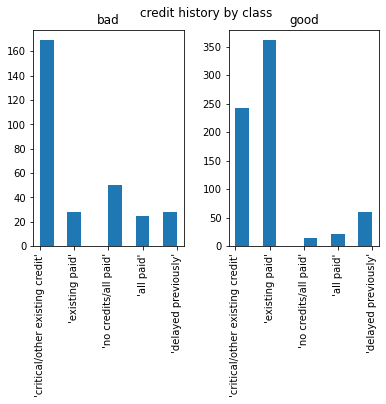

In [90]:
df.hist(by="class", column='credit_history', sharex=True)
plt.suptitle("credit history by class")

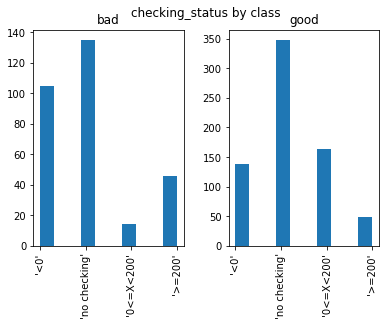

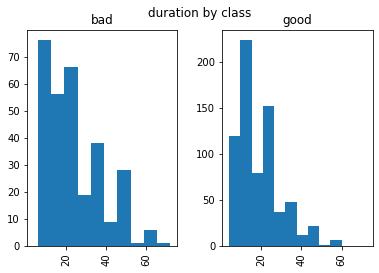

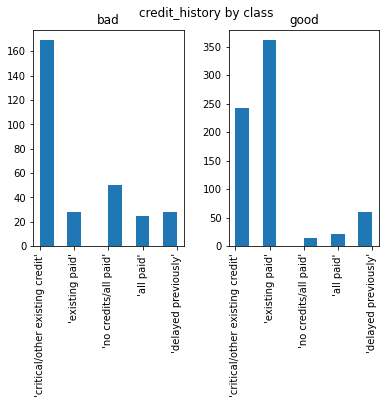

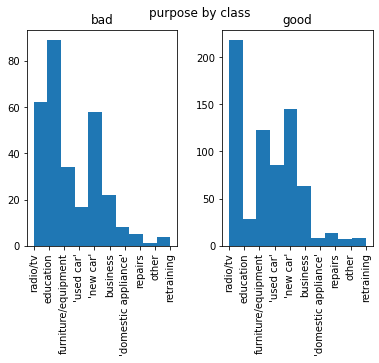

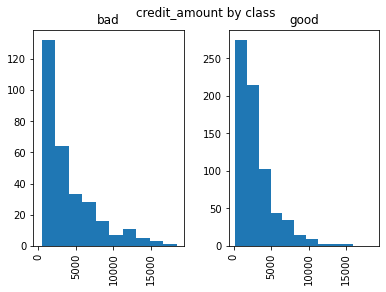

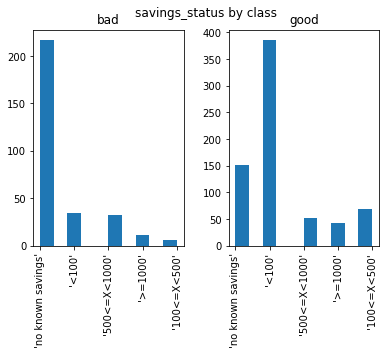

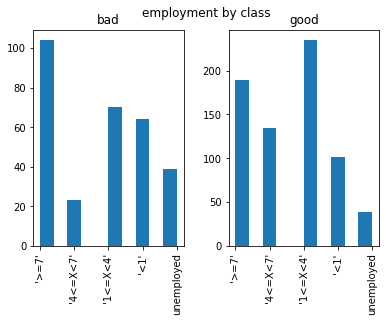

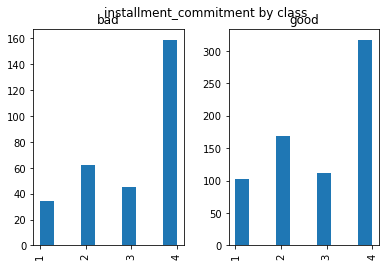

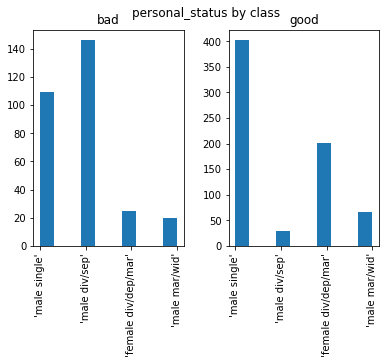

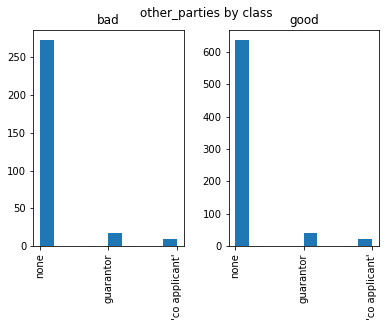

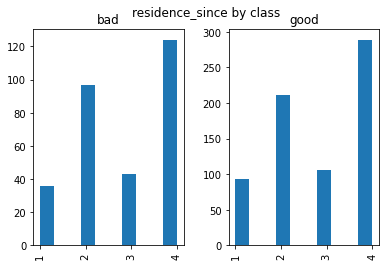

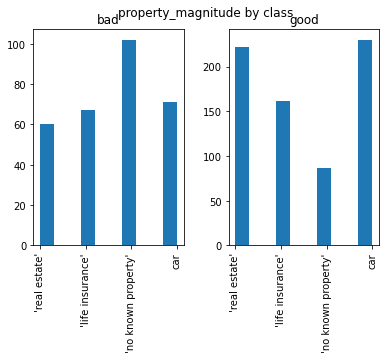

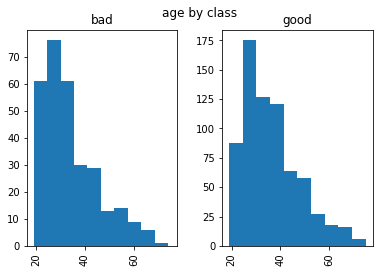

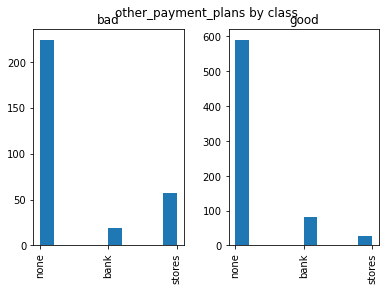

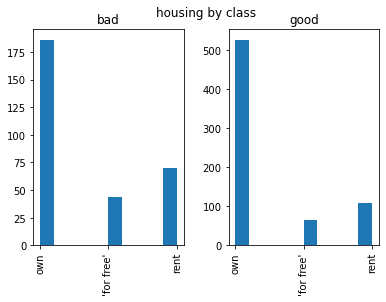

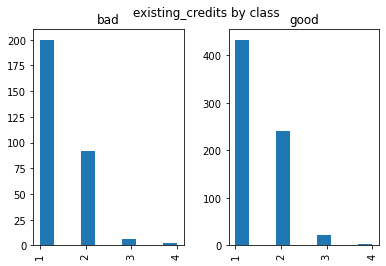

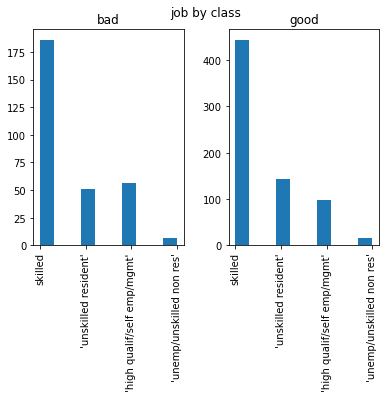

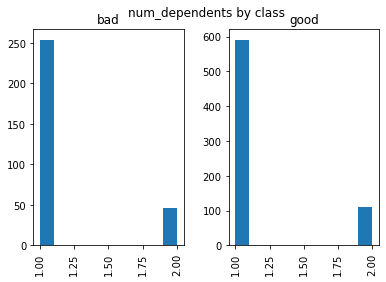

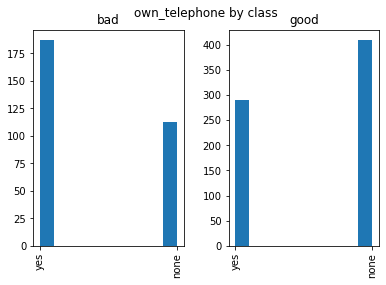

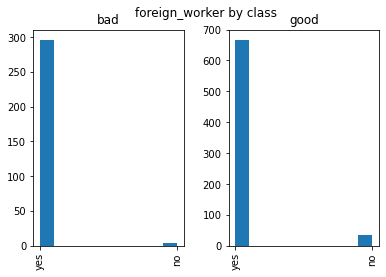

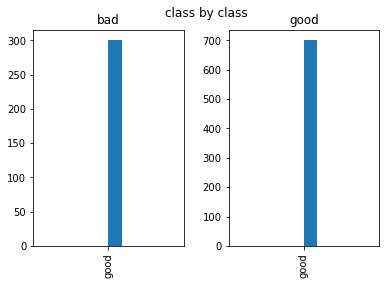

In [93]:
for col in df.columns:
    df.hist(by="class", column=col, sharex=True)
    plt.suptitle(col + " by class")

<AxesSubplot:xlabel='checking_status'>

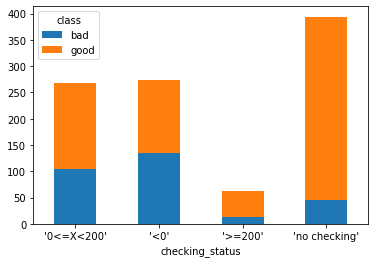

In [76]:
    # checking status vs class
    df.groupby(['checking_status', 'class'])['checking_status'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', rot=0)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

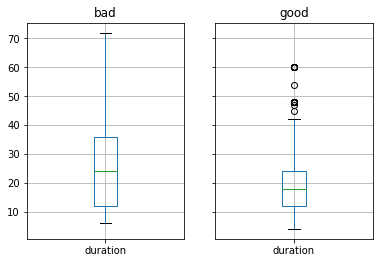

In [12]:
    # duration vs class
    df[['duration', 'class']].groupby('class').boxplot()

In [13]:
    # credit history vs class
    df.groupby(['credit_history', 'class'])['credit_history'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(12, 6), rot=0)

SyntaxError: invalid syntax (<ipython-input-13-1a1d18b17fe9>, line 3)

<AxesSubplot:xlabel='purpose'>

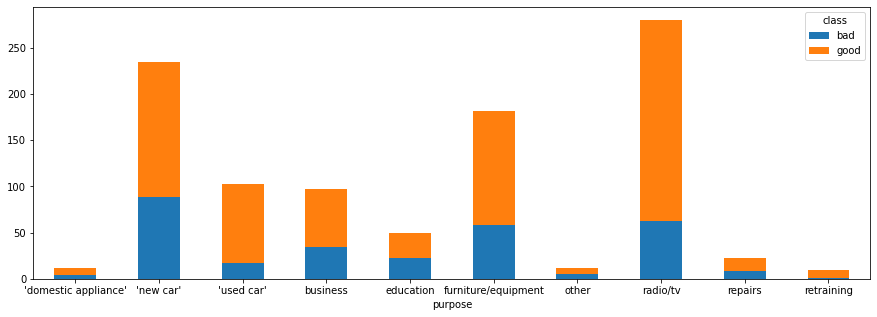

In [14]:
    # purpose vs class
    df.groupby(['purpose', 'class'])['purpose'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(15, 5), rot=0)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

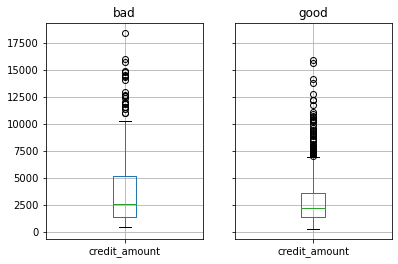

In [15]:
    # credit amount vs class
    df[['credit_amount', 'class']].groupby('class').boxplot()


In [ ]:
    # saving status vs class
    df.groupby(['savings_status', 'class'])['savings_status'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(12, 4), rot=0)

<AxesSubplot:xlabel='employment'>

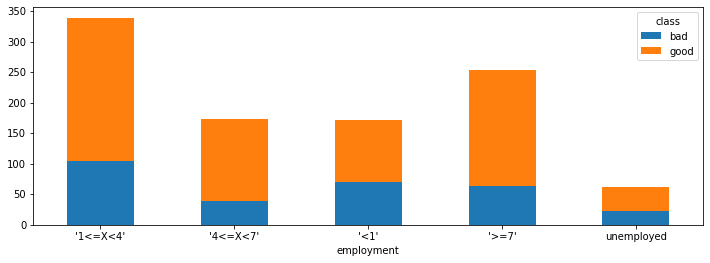

In [16]:
    # employment vs class
    df.groupby(['employment', 'class'])['employment'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(12, 4), rot=0)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

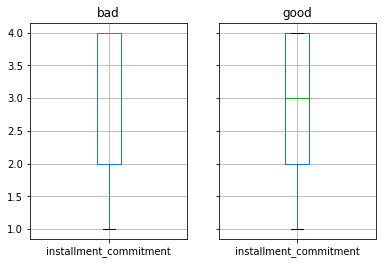

In [17]:
    # installment commitment vs class
    df[['installment_commitment', 'class']].groupby('class').boxplot()

<AxesSubplot:xlabel='personal_status'>

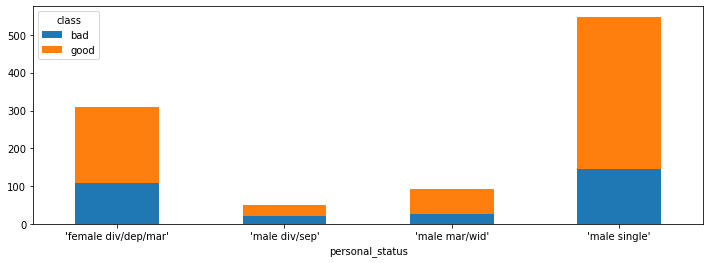

In [18]:
# personal status vs class
df.groupby(['personal_status', 'class'])['personal_status'].count().unstack('class').fillna(0).plot(
    kind='bar', stacked='true', figsize=(12, 4), rot=0)

<AxesSubplot:xlabel='other_parties'>

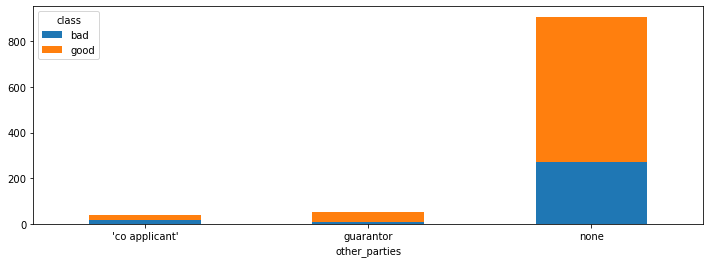

In [19]:
    # other parties vs class
    df.groupby(['other_parties', 'class'])['other_parties'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(12, 4), rot=0)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

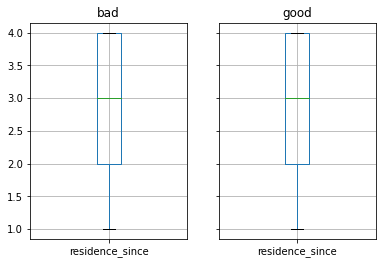

In [20]:
    # residence since vs class
    df[['residence_since', 'class']].groupby('class').boxplot()

<AxesSubplot:xlabel='property_magnitude'>

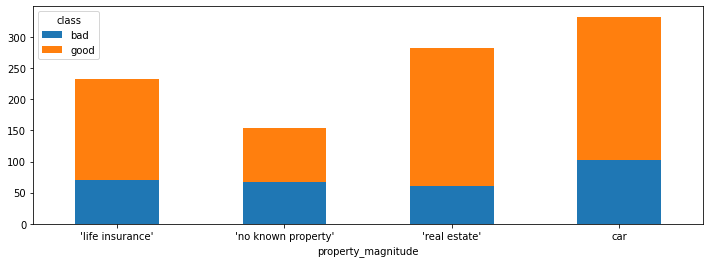

In [22]:
    # property magnitude vs class
    df.groupby(['property_magnitude', 'class'])['property_magnitude'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(12, 4), rot=0)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

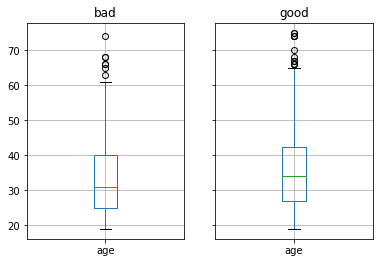

In [23]:
    # age vs class
    df[['age', 'class']].groupby('class').boxplot()

<AxesSubplot:xlabel='other_payment_plans'>

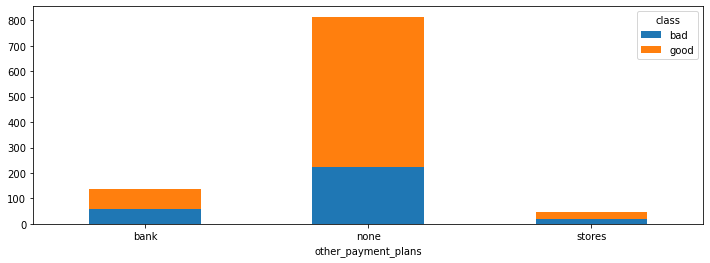

In [24]:
    # other payment plans vs class
    df.groupby(['other_payment_plans', 'class'])['other_payment_plans'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(12, 4), rot=0)

<AxesSubplot:xlabel='housing'>

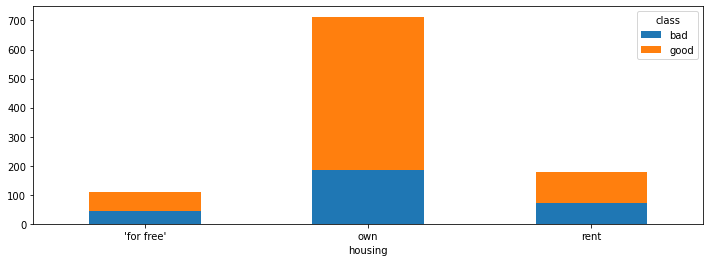

In [25]:
    # housing vs class
    df.groupby(['housing', 'class'])['housing'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', figsize=(12, 4), rot=0)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

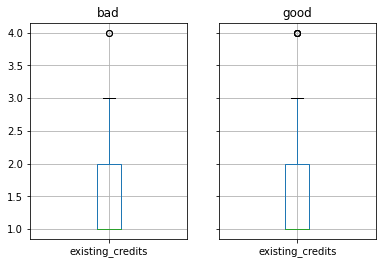

In [26]:
    # existing credits vs class
    df[['existing_credits', 'class']].groupby('class').boxplot()

<AxesSubplot:xlabel='job'>

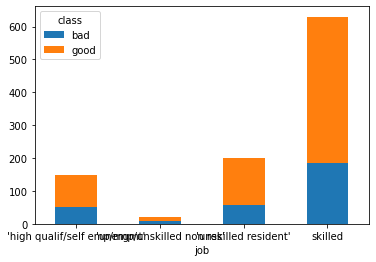

In [27]:
    # job vs class
    df.groupby(['job', 'class'])['job'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', rot=0)

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

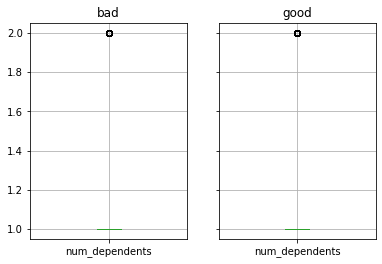

In [28]:
    # number of dependents vs class
    df[['num_dependents', 'class']].groupby('class').boxplot()

<AxesSubplot:xlabel='own_telephone'>

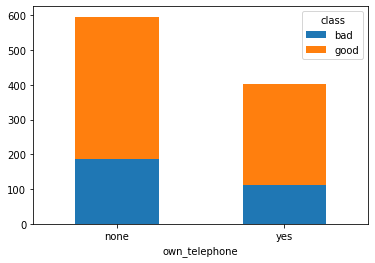

In [29]:
    # own telephone vs class
    df.groupby(['own_telephone', 'class'])['own_telephone'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', rot=0)

<AxesSubplot:xlabel='foreign_worker'>

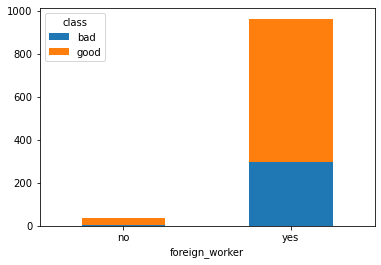

In [30]:
    # foreign worker vs class
    df.groupby(['foreign_worker', 'class'])['foreign_worker'].count().unstack('class').fillna(0).plot(
        kind='bar', stacked='true', rot=0)